In [ ]:
pip install -U imbalanced-learn


In [4]:
# Phase 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    recall_score, precision_score, roc_auc_score, f1_score, fbeta_score,
    precision_recall_curve, roc_curve
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Load the data
df = pd.read_csv('cs-training.csv', index_col=0)
print(df.shape)
df.head()


(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Phase 2 : EDA

In [8]:
import pandas as pd

df = pd.read_csv('cs-training.csv', index_col=0)
print("Shape:", df.shape)
df.head()


Shape: (150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


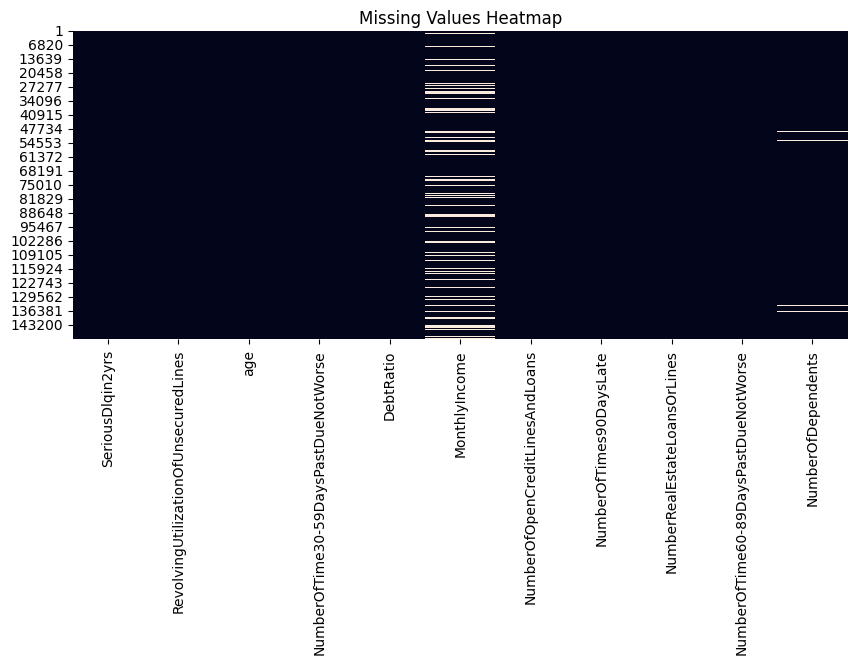

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

df.isnull().sum()


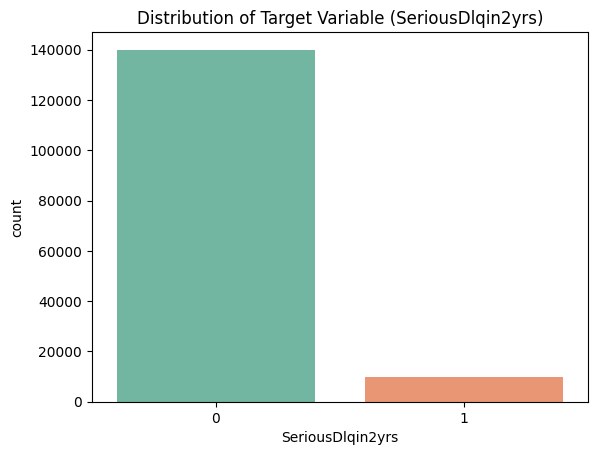

Default Rate: 6.68%


In [11]:
sns.countplot(data=df, x='SeriousDlqin2yrs', palette='Set2')
plt.title('Distribution of Target Variable (SeriousDlqin2yrs)')
plt.show()

default_rate = df['SeriousDlqin2yrs'].mean()
print(f"Default Rate: {default_rate*100:.2f}%")


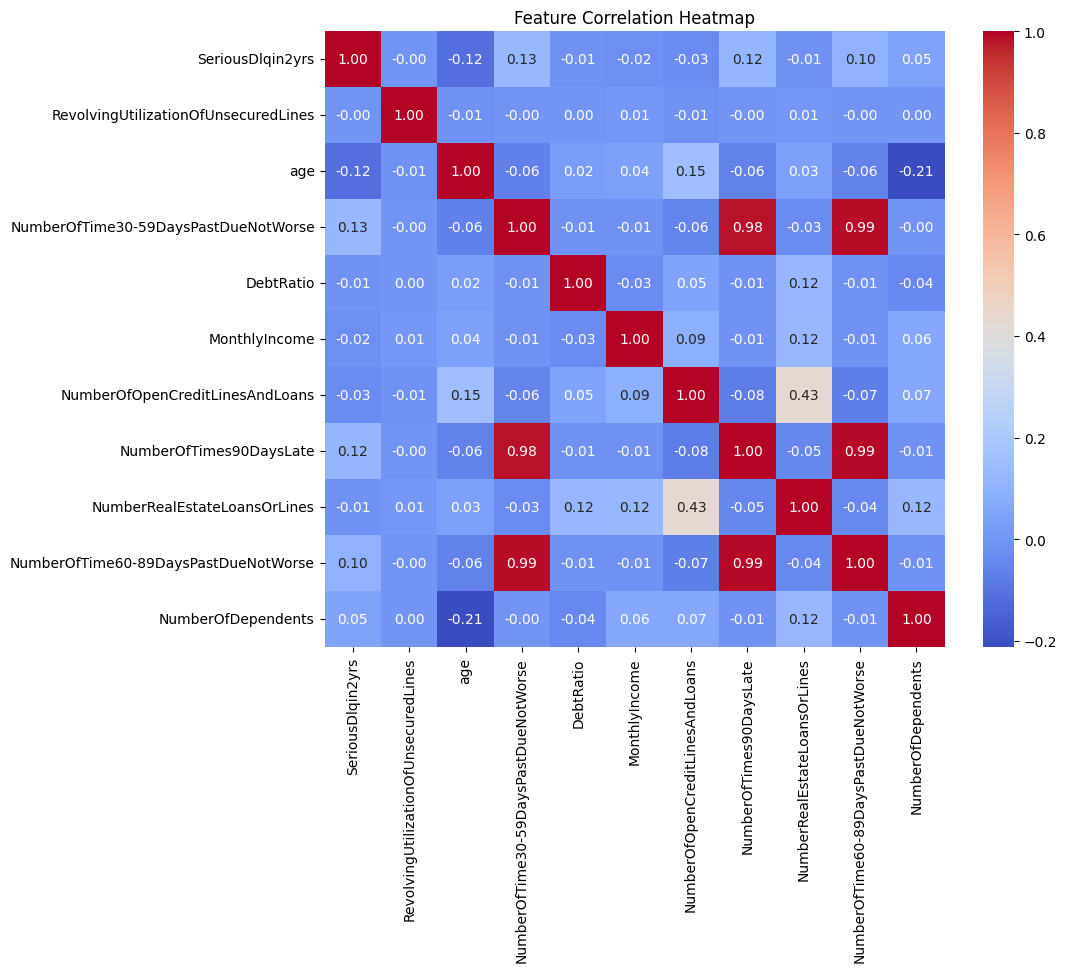

In [12]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


MonthlyIncome                           114.040318
RevolvingUtilizationOfUnsecuredLines     97.631574
DebtRatio                                95.157793
NumberOfTime60-89DaysPastDueNotWorse     23.331743
NumberOfTimes90DaysLate                  23.087345
NumberOfTime30-59DaysPastDueNotWorse     22.597108
NumberRealEstateLoansOrLines              3.482484
SeriousDlqin2yrs                          3.468857
NumberOfDependents                        1.588242
NumberOfOpenCreditLinesAndLoans           1.215314
age                                       0.188995
dtype: float64


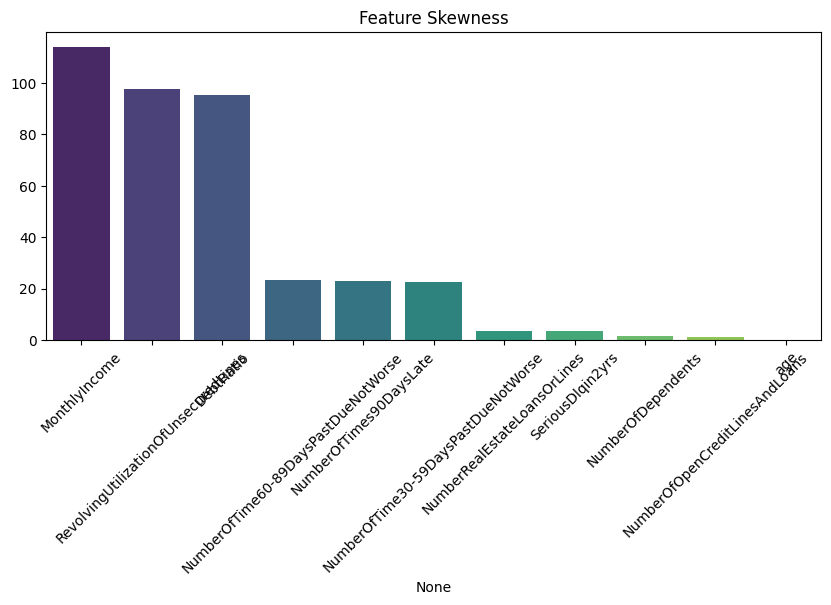

In [13]:
skew_vals = df.skew(numeric_only=True).sort_values(ascending=False)
print(skew_vals)

plt.figure(figsize=(10,4))
sns.barplot(x=skew_vals.index, y=skew_vals.values, palette='viridis')
plt.title("Feature Skewness")
plt.xticks(rotation=45)
plt.show()


In [14]:
import numpy as np

for col in ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']:
    df[col] = np.log1p(df[col])


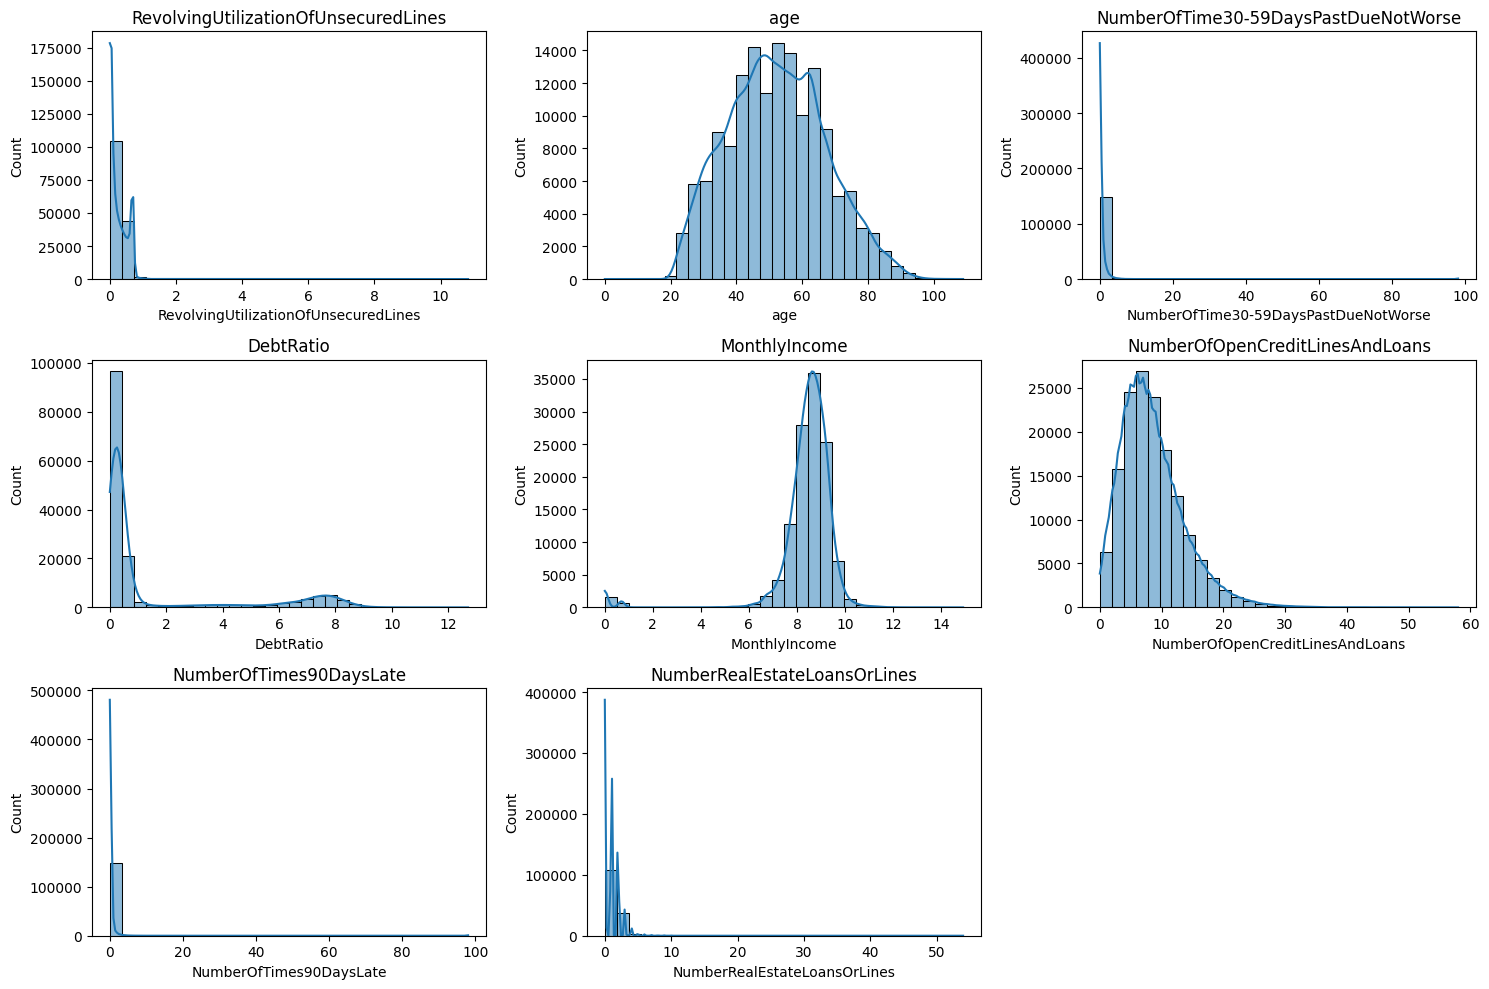

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('SeriousDlqin2yrs')

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:8]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


In [16]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)


In [17]:
df.isnull().sum()


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

EDA -->completed

Phase 3 - Feature Engineering & Data Preparation

In [18]:
import numpy as np

# Make a copy so original remains safe
data = df.copy()

# Total number of past dues (combines all late-payment counts)
data['TotalPastDue'] = (
    data['NumberOfTime30-59DaysPastDueNotWorse'] +
    data['NumberOfTime60-89DaysPastDueNotWorse'] +
    data['NumberOfTimes90DaysLate']
)

# Debt-to-Income proxy: DebtRatio * MonthlyIncome
data['DebtToIncome'] = data['DebtRatio'] * data['MonthlyIncome']

# Credit utilization per open line
data['UtilizationPerCreditLine'] = (
    data['RevolvingUtilizationOfUnsecuredLines'] /
    (1 + data['NumberOfOpenCreditLinesAndLoans'])
)

# Credit lines per dependent (people with many dependents but few lines)
data['CreditLinesPerDependent'] = (
    data['NumberOfOpenCreditLinesAndLoans'] /
    (1 + data['NumberOfDependents'])
)

# Binary flag: whether customer has any real estate loan
data['HasRealEstate'] = (data['NumberRealEstateLoansOrLines'] > 0).astype(int)

# Interaction term: age multiplied by total past-due count
data['Age_Delinquency_Interaction'] = data['age'] * data['TotalPastDue']


In [19]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

print(data.isnull().sum())


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
TotalPastDue                            0
DebtToIncome                            0
UtilizationPerCreditLine                0
CreditLinesPerDependent                 0
HasRealEstate                           0
Age_Delinquency_Interaction             0
dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler

X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Default rate in train:", y_train.mean())
print("Default rate in test:", y_test.mean())


Train shape: (105000, 16)
Test shape: (45000, 16)
Default rate in train: 0.06683809523809524
Default rate in test: 0.06684444444444444


In [22]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print("Before resampling:", y_train.value_counts(normalize=True))
print("After resampling:", y_train_res.value_counts(normalize=True))


Before resampling: SeriousDlqin2yrs
0    0.933162
1    0.066838
Name: proportion, dtype: float64
After resampling: SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    recall_score, precision_score, f1_score, roc_auc_score, fbeta_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, roc_auc_score
import pandas as pd
import numpy as np

def evaluate_models(X_train, X_test, y_train, y_test, X_train_res, y_train_res):
    # Define models to evaluate
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(
            use_label_encoder=False, 
            eval_metric='logloss',
            random_state=42,
            n_estimators=300,
            learning_rate=0.1,
            max_depth=5
        )
    }

    results = []

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")

        # -------------------------------
        # 1️⃣ Train on UNBALANCED data
        # -------------------------------
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        results.append({
            "Model": model_name,
            "Data": "Unbalanced",
            "Recall": recall_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "F1": f1_score(y_test, y_pred),
            "F2": fbeta_score(y_test, y_pred, beta=2),
            "AUC": roc_auc_score(y_test, y_prob)
        })

        # -------------------------------
        # 2️⃣ Train on BALANCED data (SMOTE+Tomek)
        # -------------------------------
        model.fit(X_train_res, y_train_res)
        y_pred_bal = model.predict(X_test)
        y_prob_bal = model.predict_proba(X_test)[:, 1]

        results.append({
            "Model": model_name,
            "Data": "Balanced",
            "Recall": recall_score(y_test, y_pred_bal),
            "Precision": precision_score(y_test, y_pred_bal, zero_division=0),
            "F1": f1_score(y_test, y_pred_bal),
            "F2": fbeta_score(y_test, y_pred_bal, beta=2),
            "AUC": roc_auc_score(y_test, y_prob_bal)
        })

    # -------------------------------
    # 3️⃣ Results summary
    # -------------------------------
    results_df = pd.DataFrame(results)
    results_df = results_df.round(4)

    print("\n✅ Model Evaluation Complete!")
    print(results_df)
    return results_df


In [30]:
results_df = evaluate_models(X_train, X_test, y_train, y_test, X_train_res, y_train_res)
results_df



Training Logistic Regression...

Training Random Forest...

Training XGBoost...

✅ Model Evaluation Complete!
                 Model        Data  Recall  Precision      F1      F2     AUC
0  Logistic Regression  Unbalanced  0.0359     0.4219  0.0662  0.0439  0.7723
1  Logistic Regression    Balanced  0.7527     0.2032  0.3200  0.4884  0.8499
2        Random Forest  Unbalanced  0.1885     0.5670  0.2829  0.2175  0.8440
3        Random Forest    Balanced  0.2955     0.4197  0.3469  0.3141  0.8270
4              XGBoost  Unbalanced  0.1892     0.5794  0.2852  0.2186  0.8635
5              XGBoost    Balanced  0.3035     0.4620  0.3664  0.3259  0.8486


,Model,Data,Recall,Precision,F1,F2,AUC
0,Logistic Regression,Unbalanced,0.0359,0.4219,0.0662,0.0439,0.7723
1,Logistic Regression,Balanced,0.7527,0.2032,0.3200,0.4884,0.8499
2,Random Forest,Unbalanced,0.1885,0.5670,0.2829,0.2175,0.8440
3,Random Forest,Balanced,0.2955,0.4197,0.3469,0.3141,0.8270
4,XGBoost,Unbalanced,0.1892,0.5794,0.2852,0.2186,0.8635
5,XGBoost,Balanced,0.3035,0.4620,0.3664,0.3259,0.8486


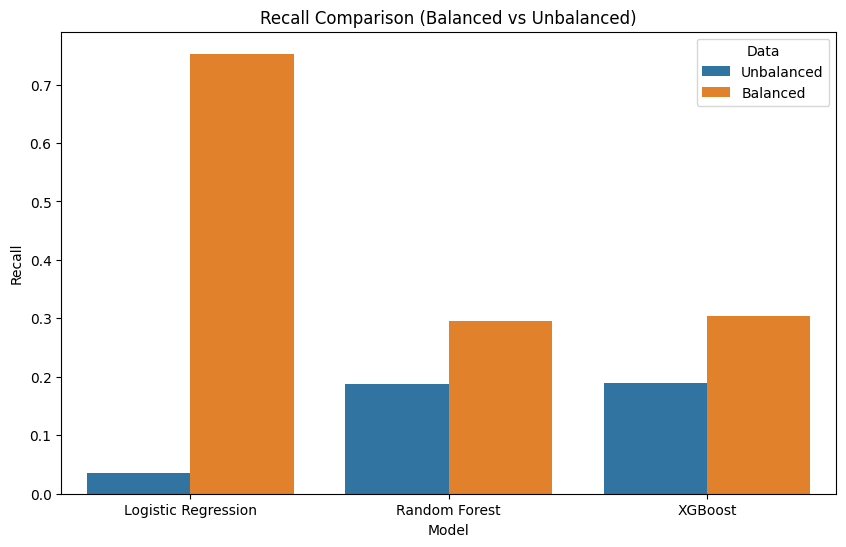

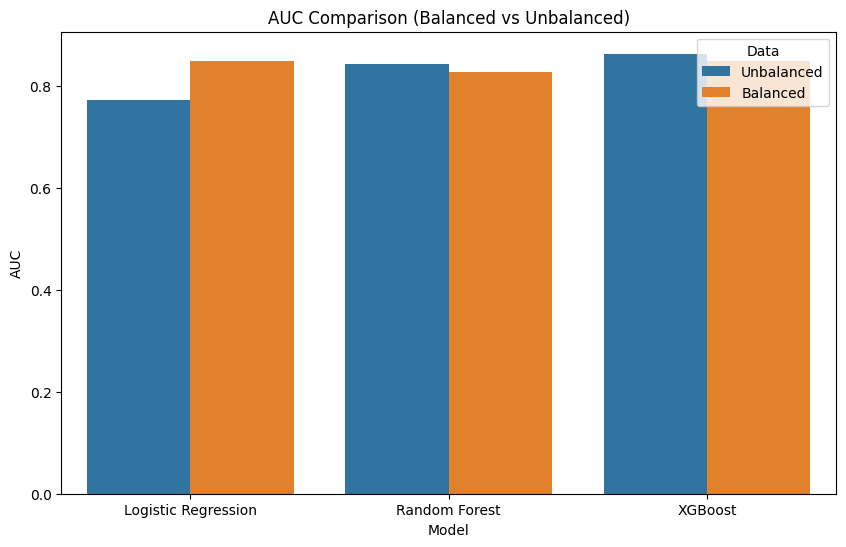

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Model', y='Recall', hue='Data')
plt.title("Recall Comparison (Balanced vs Unbalanced)")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Model', y='AUC', hue='Data')
plt.title("AUC Comparison (Balanced vs Unbalanced)")
plt.show()


Phase 5 : Logistic Regression - Recall & F2 Optimization
Goal:
🎯 Maximize recall (catch as many defaulters as possible)
⚖️ Maintain interpretability
📊 Evaluate with F2 (recall-focused score)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define model
log_reg = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced', solver='lbfgs')

# Define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# 5-fold stratified CV for stable results
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search optimizing RECALL
grid = GridSearchCV(log_reg, param_grid, scoring='recall', cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

best_logreg = grid.best_estimator_

print("✅ Best Logistic Regression Parameters:", grid.best_params_)


✅ Best Logistic Regression Parameters: {'C': 0.01}


In [33]:
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, roc_auc_score

y_pred = best_logreg.predict(X_test)
y_prob = best_logreg.predict_proba(X_test)[:, 1]

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
auc = roc_auc_score(y_test, y_prob)

print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1: {f1:.3f}")
print(f"F2: {f2:.3f}")
print(f"AUC: {auc:.3f}")


Recall: 0.751
Precision: 0.188
F1: 0.301
F2: 0.470
AUC: 0.839


In [34]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
f2_scores = [fbeta_score(y_test, (y_prob >= t).astype(int), beta=2) for t in thresholds]
best_threshold = thresholds[np.argmax(f2_scores)]
best_f2 = np.max(f2_scores)

print(f"🔹 Best Threshold for F2: {best_threshold:.3f}")
print(f"🔹 Max F2-Score: {best_f2:.3f}")


🔹 Best Threshold for F2: 0.596
🔹 Max F2-Score: 0.488


In [35]:
y_pred_opt = (y_prob >= best_threshold).astype(int)

recall_opt = recall_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
f2_opt = fbeta_score(y_test, y_pred_opt, beta=2)
auc_opt = roc_auc_score(y_test, y_prob)

print(f"Recall (Optimized): {recall_opt:.3f}")
print(f"Precision (Optimized): {precision_opt:.3f}")
print(f"F1 (Optimized): {f1_opt:.3f}")
print(f"F2 (Optimized): {f2_opt:.3f}")
print(f"AUC (Optimized): {auc_opt:.3f}")


Recall (Optimized): 0.661
Precision (Optimized): 0.239
F1 (Optimized): 0.351
F2 (Optimized): 0.488
AUC (Optimized): 0.839


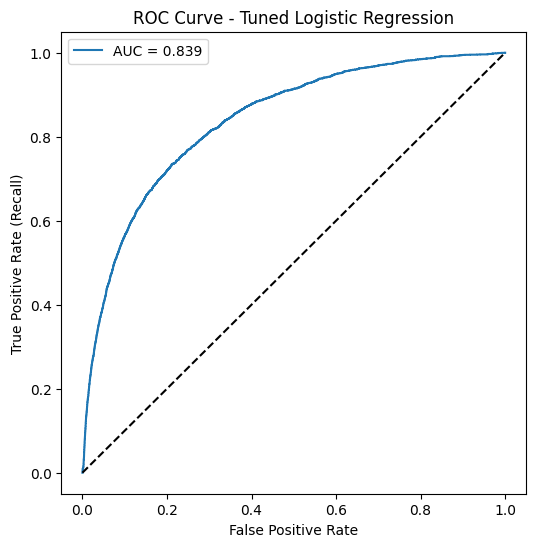

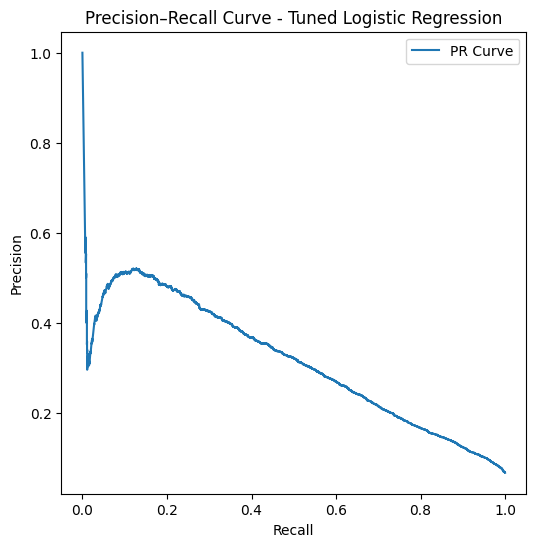

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend()
plt.show()

# Precision–Recall Curve
plt.figure(figsize=(6,6))
plt.plot(rec, prec, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve - Tuned Logistic Regression')
plt.legend()
plt.show()


In [37]:
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                                 Feature  Coefficient
15           Age_Delinquency_Interaction     3.861511
0   RevolvingUtilizationOfUnsecuredLines     1.021261
11                          DebtToIncome     0.434053
7           NumberRealEstateLoansOrLines     0.220035
9                     NumberOfDependents     0.100173
5        NumberOfOpenCreditLinesAndLoans     0.088904
12              UtilizationPerCreditLine     0.086794
13               CreditLinesPerDependent     0.085709
2   NumberOfTime30-59DaysPastDueNotWorse    -0.007359
4                          MonthlyIncome    -0.133863
6                NumberOfTimes90DaysLate    -0.165656
14                         HasRealEstate    -0.210153
1                                    age    -0.355599
3                              DebtRatio    -0.476579
10                          TotalPastDue    -0.499193
8   NumberOfTime60-89DaysPastDueNotWorse    -1.324016


In [38]:
import joblib
joblib.dump(best_logreg, "logreg_tuned_creditrisk.pkl")
print("Model saved successfully!")


Model saved successfully!


⚙️ PHASE 5B: XGBoost — Ranking and Risk Profiling Model
🎯 Objective:

Handle class imbalance with scale_pos_weight

Maximize recall and AUC

Keep interpretability with feature importance and SHAP

Complement logistic regression (not replace it)

In [39]:
neg = y_train.value_counts()[0]
pos = y_train.value_counts()[1]
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")


scale_pos_weight: 13.96


In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)


In [41]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print("✅ Best XGBoost Parameters:", grid_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best XGBoost Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, roc_auc_score

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
f2_xgb = fbeta_score(y_test, y_pred_xgb, beta=2)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"Recall: {recall_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"F1: {f1_xgb:.3f}")
print(f"F2: {f2_xgb:.3f}")
print(f"AUC: {auc_xgb:.3f}")


Recall: 0.810
Precision: 0.180
F1: 0.294
F2: 0.476
AUC: 0.856


In [43]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thresholds = precision_recall_curve(y_test, y_prob_xgb)
f2_scores = [fbeta_score(y_test, (y_prob_xgb >= t).astype(int), beta=2) for t in thresholds]
best_threshold_xgb = thresholds[np.argmax(f2_scores)]
best_f2_xgb = np.max(f2_scores)

print(f"🔹 Best Threshold for F2: {best_threshold_xgb:.3f}")
print(f"🔹 Max F2 Score: {best_f2_xgb:.3f}")


🔹 Best Threshold for F2: 0.594
🔹 Max F2 Score: 0.511


In [44]:
y_pred_opt_xgb = (y_prob_xgb >= best_threshold_xgb).astype(int)

recall_opt_xgb = recall_score(y_test, y_pred_opt_xgb)
precision_opt_xgb = precision_score(y_test, y_pred_opt_xgb)
f1_opt_xgb = f1_score(y_test, y_pred_opt_xgb)
f2_opt_xgb = fbeta_score(y_test, y_pred_opt_xgb, beta=2)
auc_opt_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"Recall (Opt): {recall_opt_xgb:.3f}")
print(f"Precision (Opt): {precision_opt_xgb:.3f}")
print(f"F1 (Opt): {f1_opt_xgb:.3f}")
print(f"F2 (Opt): {f2_opt_xgb:.3f}")
print(f"AUC (Opt): {auc_opt_xgb:.3f}")


Recall (Opt): 0.624
Precision (Opt): 0.296
F1 (Opt): 0.402
F2 (Opt): 0.511
AUC (Opt): 0.856


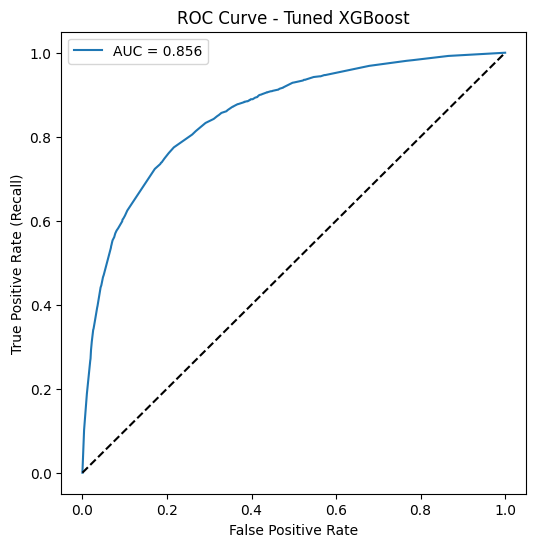

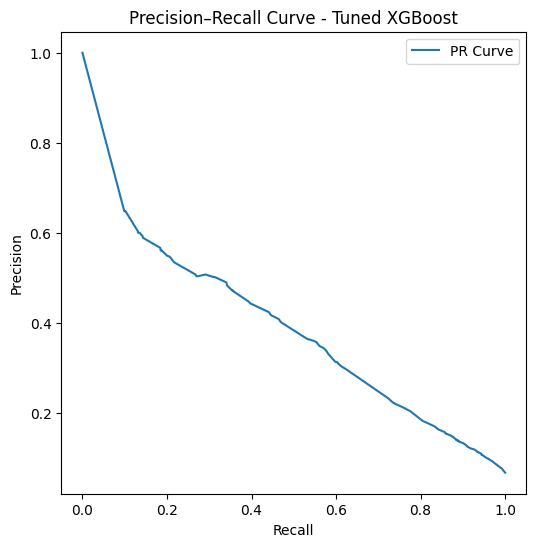

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend()
plt.show()

# Precision–Recall Curve
plt.figure(figsize=(6,6))
plt.plot(rec, prec, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve - Tuned XGBoost')
plt.legend()
plt.show()


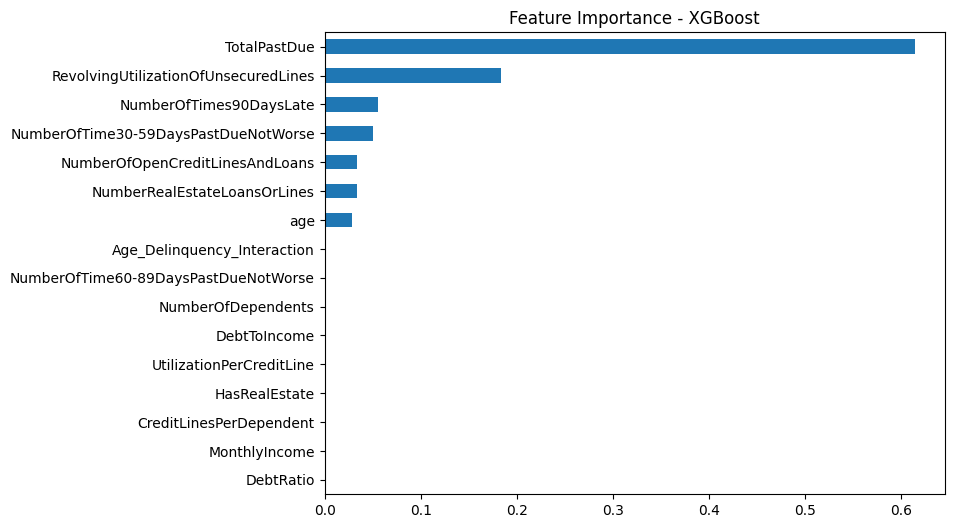

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=True)
feature_importances.plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance - XGBoost')
plt.show()


In [ ]:
pip install -U shap xgboost


In [ ]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


<Figure size 800x600 with 0 Axes>

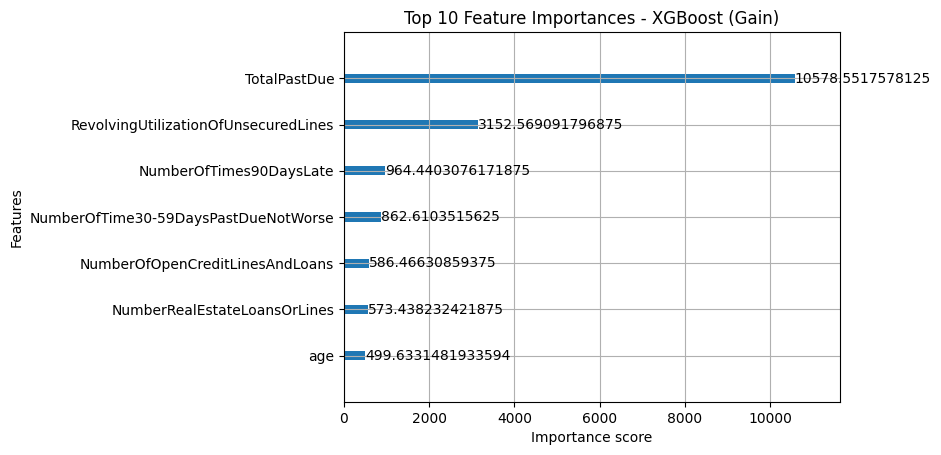

In [57]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_importance(best_xgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances - XGBoost (Gain)")
plt.show()


In [59]:
import joblib
joblib.dump(best_xgb, "xgboost_credit_risk.pkl")
print("XGBoost model saved successfully!")


XGBoost model saved successfully!


🧭 PHASE 6: Final Evaluation + Risk Segmentation

We’ll now compare the final tuned Logistic Regression and XGBoost models — not just by metrics, but by how they behave in real lending decisions.

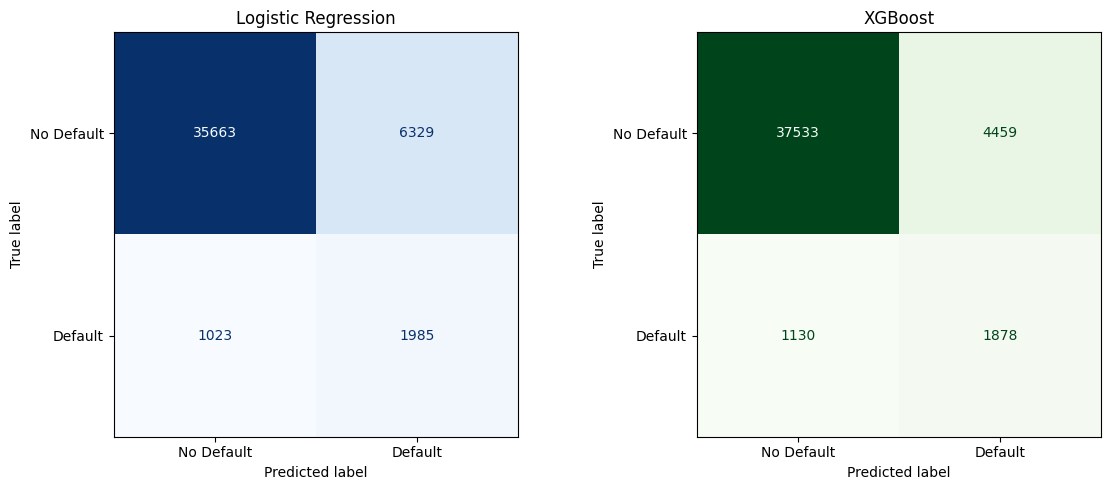

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression predictions (optimized threshold)
y_prob_lr = best_logreg.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.596).astype(int)  # use your optimal threshold

# XGBoost predictions (optimized threshold)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.594).astype(int)

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=["No Default", "Default"]).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=["No Default", "Default"]).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()


In [61]:
import pandas as pd

# Convert probabilities into bins
risk_df = pd.DataFrame({
    'Actual': y_test,
    'LogReg_Prob': y_prob_lr,
    'XGB_Prob': y_prob_xgb
})

def risk_bucket(prob):
    if prob < 0.3:
        return 'Low Risk'
    elif prob < 0.6:
        return 'Medium Risk'
    else:
        return 'High Risk'

risk_df['XGB_RiskTier'] = risk_df['XGB_Prob'].apply(risk_bucket)
risk_df['LogReg_RiskTier'] = risk_df['LogReg_Prob'].apply(risk_bucket)

# Distribution
risk_summary = risk_df.groupby('XGB_RiskTier')['Actual'].agg(['count', 'mean'])
risk_summary.rename(columns={'mean': 'DefaultRate'}, inplace=True)
risk_summary['DefaultRate'] = (risk_summary['DefaultRate'] * 100).round(2)

print(risk_summary)


              count  DefaultRate
XGB_RiskTier                    
High Risk      6066        30.35
Low Risk      22818         1.16
Medium Risk   16116         5.60


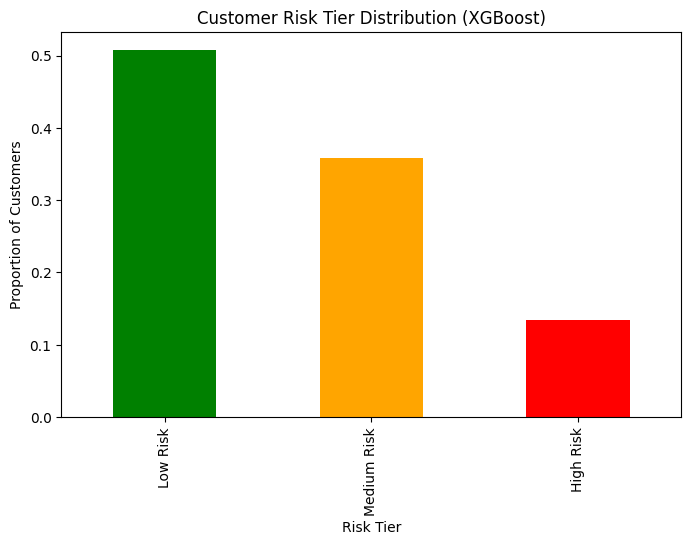

In [62]:
plt.figure(figsize=(8,5))
risk_df['XGB_RiskTier'].value_counts(normalize=True).plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Customer Risk Tier Distribution (XGBoost)")
plt.ylabel("Proportion of Customers")
plt.xlabel("Risk Tier")
plt.show()


In [63]:
from scipy.stats import ks_2samp

ks_statistic = ks_2samp(y_prob_xgb[y_test==0], y_prob_xgb[y_test==1]).statistic
print(f"KS Statistic (XGBoost): {ks_statistic:.3f}")


KS Statistic (XGBoost): 0.558


In [64]:
import joblib
joblib.dump(best_logreg, "logreg_final_credit.pkl")
joblib.dump(best_xgb, "xgboost_final_credit.pkl")
print("✅ Models saved successfully!")


✅ Models saved successfully!


In [ ]:
pip install streamlit joblib xgboost scikit-learn
